In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp

Loading the File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Also Load by (Instead of signing with drive)

In [ ]:
df = pd.read_excel("/content/ECU_IoHT.xlsx")

In [ ]:
df.Info.nunique()

AttributeError: 'NoneType' object has no attribute 'Info'

In [ ]:
df.Protocol.nunique()

11

In [ ]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
...,...,...,...,...,...,...,...,...,...
111202,111203,10103.029320,Alfa_97:cf:63,6e:c7:ec:3c:f2:ba,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
111203,111204,10103.140580,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
111204,111205,10103.383780,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing
111205,111206,10106.386960,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111207 entries, 0 to 111206
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   No.             111207 non-null  int64  
 1   Time            111207 non-null  float64
 2   Source          111207 non-null  object 
 3   Destination     111207 non-null  object 
 4   Protocol        111207 non-null  object 
 5   Length          111207 non-null  int64  
 6   Info            111207 non-null  object 
 7   Type            111207 non-null  object 
 8   Type of attack  111207 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


We need only 5 Features: Source, Destination, Protocol, Length, Type. With Output column being type of attack

Using drop method to remove unwanted Features

In [ ]:
df_dropped = df.drop(["No.", "Time", "Source", "Info", "Destination"], axis = 1)

In [ ]:
df_dropped

,Protocol,Length,Type,Type of attack
0,ARP,42,Attack,ARP Spoofing
1,ARP,42,Attack,ARP Spoofing
2,ARP,42,Attack,ARP Spoofing
3,DNS,85,Normal,No Attack
4,ARP,42,Attack,ARP Spoofing
...,...,...,...,...
111202,ARP,42,Attack,ARP Spoofing
111203,ARP,42,Attack,ARP Spoofing
111204,ARP,42,Attack,ARP Spoofing
111205,ARP,42,Attack,ARP Spoofing


The categorical features are transformed into
numerical features using one-hot encoding

In [ ]:
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111207 entries, 0 to 111206
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Source          111207 non-null  object
 1   Destination     111207 non-null  object
 2   Protocol        111207 non-null  object
 3   Length          111207 non-null  int64 
 4   Type            111207 non-null  object
 5   Type of attack  111207 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.1+ MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()

In [ ]:
df_dropped.Source.nunique()

69

In [ ]:
df_dropped.Source.unique()

array(['Alfa_97:cf:63', '6e:c7:ec:3c:f2:ba', '192.168.43.186',
       '192.168.43.1', 'Espressi_22:2d:c9', '192.168.43.200',
       '23.40.101.80', '13.32.73.101', '172.217.167.78', '142.250.67.3',
       '23.40.101.73', '13.32.73.124', '117.18.237.29', '142.250.66.196',
       '142.250.66.206', '172.217.167.66', '172.217.167.110',
       '216.58.196.133', '172.217.25.141', '172.217.167.99',
       '142.250.66.227', '216.58.203.110', '216.58.196.129',
       '52.50.150.86', '13.32.73.6', '172.217.167.74', '34.253.97.22',
       '216.58.199.78', '13.32.73.119', '34.196.191.3', '13.32.126.190',
       '13.32.73.42', '13.32.73.79', '104.22.52.65', '216.58.199.40',
       '104.16.85.20', '142.250.66.162', '157.240.8.23', '172.217.25.162',
       '172.217.25.34', '13.32.73.104', '104.22.53.65', '13.32.73.98',
       '142.250.66.174', '142.250.66.161', '13.238.187.36', '3.7.131.42',
       '157.240.8.7', '142.250.66.230', '103.43.90.20', '100.20.136.126',
       '104.18.7.124', '107.160.33.1

What to do with values like Alfa97, 6e:c7, Espressi as they are not numerical? Let them stay as strings?

In [ ]:
df_dropped.Source.info()

<class 'pandas.core.series.Series'>
RangeIndex: 111207 entries, 0 to 111206
Series name: Source
Non-Null Count   Dtype 
--------------   ----- 
111207 non-null  object
dtypes: object(1)
memory usage: 868.9+ KB


In [ ]:
df_dropped.Destination.nunique()


71

In [ ]:
df_dropped.Destination.unique()

array(['Broadcast', 'Alfa_97:cf:63', '192.168.43.1', '192.168.43.186',
       '6e:c7:ec:3c:f2:ba', '192.168.43.200', 'Espressi_22:2d:c9',
       '52.208.217.22', '23.40.101.80', '13.32.73.101', '172.217.167.78',
       '142.250.67.3', '23.40.101.73', '13.32.73.124', '117.18.237.29',
       '142.250.66.196', '142.250.66.206', '172.217.167.66',
       '172.217.167.110', '216.58.196.133', '172.217.25.141',
       '172.217.167.99', '142.250.66.227', '216.58.203.110',
       '216.58.196.129', '52.50.150.86', '13.32.73.6', '172.217.167.74',
       '34.253.97.22', '216.58.199.78', '13.32.73.119', '34.196.191.3',
       '13.32.126.190', '13.32.73.42', '13.32.73.79', '104.22.52.65',
       '216.58.199.40', '104.16.85.20', '142.250.66.162', '157.240.8.23',
       '172.217.25.162', '172.217.25.34', '13.32.73.104', '104.22.53.65',
       '13.32.73.98', '142.250.66.174', '142.250.66.161', '13.238.187.36',
       '3.7.131.42', '142.250.66.230', '157.240.8.7', '103.43.90.20',
       '107.160.33.186',

In [ ]:
df_dropped.Protocol.nunique()


11

In [ ]:
df_dropped.Protocol.unique()

array(['ARP', 'DNS', 'TCP', 'LLC', 'ICMP', 'UDP', 'DHCP', 'TLSv1.1',
       'HTTP', 'TLSv1.2', 'OCSP'], dtype=object)

In [ ]:
df_dropped.Length.nunique()

794

We have 11 diffrent Protocols, 71 Diffrent Destinations, 69 Diffrent Sources, 794 diffrent Lengths, 2 Types and 5 Types_of_Attacks

In [ ]:
df_dropped.rename(columns={'Type of attack': 'Types_of_Attacks'}, inplace=True)
df_dropped

,Protocol,Length,Type,Types_of_Attacks
0,ARP,42,Attack,ARP Spoofing
1,ARP,42,Attack,ARP Spoofing
2,ARP,42,Attack,ARP Spoofing
3,DNS,85,Normal,No Attack
4,ARP,42,Attack,ARP Spoofing
...,...,...,...,...
111202,ARP,42,Attack,ARP Spoofing
111203,ARP,42,Attack,ARP Spoofing
111204,ARP,42,Attack,ARP Spoofing
111205,ARP,42,Attack,ARP Spoofing


In [ ]:
df_dropped.loc[:,['Length','Protocol','Type', 'Types_of_Attacks']]

,Length,Protocol,Type,Types_of_Attacks
0,42,ARP,Attack,ARP Spoofing
1,42,ARP,Attack,ARP Spoofing
2,42,ARP,Attack,ARP Spoofing
3,85,DNS,Normal,No Attack
4,42,ARP,Attack,ARP Spoofing
...,...,...,...,...
111202,42,ARP,Attack,ARP Spoofing
111203,42,ARP,Attack,ARP Spoofing
111204,42,ARP,Attack,ARP Spoofing
111205,42,ARP,Attack,ARP Spoofing


Algorithm 1: One-hot encoding for encoding categorical data

> Indented block


Input: D(f1,f2, . . . , fn)
IOutput: Dencoded(f1encoded, . . . , fn encoded)

> Indented block


For i from 1 to N do
If (fi is a categorical input)

> Indented block


Encode using one hot encode method
End if

> Indented block



> Indented block


End for

Taken from the base paper

In [ ]:
y = df_dropped['Types_of_Attacks']
y
df_0 = df_dropped.drop(['Types_of_Attacks'], axis = 1)
df_0

,Protocol,Length,Type
0,ARP,42,Attack
1,ARP,42,Attack
2,ARP,42,Attack
3,DNS,85,Normal
4,ARP,42,Attack
...,...,...,...
111202,ARP,42,Attack
111203,ARP,42,Attack
111204,ARP,42,Attack
111205,ARP,42,Attack


One-Hot Encoding

In [ ]:
df1 = pd.get_dummies(df_0, columns = ['Protocol'])
#df2 = pd.get_dummies(df1, columns = ['Destination'])

#df3 = pd.get_dummies(df2, columns = ['Source'])
df4 = pd.get_dummies(df1, columns = ['Type'])
#df4 = df4.astype(int)
df1 = df4.astype(int)
print(df1)



        Length  Protocol_ARP  Protocol_DHCP  Protocol_DNS  Protocol_HTTP  \
0           42             1              0             0              0   
1           42             1              0             0              0   
2           42             1              0             0              0   
3           85             0              0             1              0   
4           42             1              0             0              0   
...        ...           ...            ...           ...            ...   
111202      42             1              0             0              0   
111203      42             1              0             0              0   
111204      42             1              0             0              0   
111205      42             1              0             0              0   
111206      42             1              0             0              0   

        Protocol_ICMP  Protocol_LLC  Protocol_OCSP  Protocol_TCP  \
0                  

11207, 24164 when you include info => introducing noise?

In [ ]:
y_0 = pd.get_dummies(y, columns = ['Types_of_Attacks'])
y_0 = y_0.astype(int)
print(y_0)

        ARP Spoofing  DoS Attack  Nmap Port Scan  No Attack  Smurf Attack
0                  1           0               0          0             0
1                  1           0               0          0             0
2                  1           0               0          0             0
3                  0           0               0          1             0
4                  1           0               0          0             0
...              ...         ...             ...        ...           ...
111202             1           0               0          0             0
111203             1           0               0          0             0
111204             1           0               0          0             0
111205             1           0               0          0             0
111206             1           0               0          0             0

[111207 rows x 5 columns]


 we normalise length??

In [ ]:
maxlen = df1['Length'].max()
maxlen

column = 'Length'
df1[column] = df1[column] /df1[column].abs().max()
df1

,Length,Protocol_ARP,Protocol_DHCP,Protocol_DNS,Protocol_HTTP,Protocol_ICMP,Protocol_LLC,Protocol_OCSP,Protocol_TCP,Protocol_TLSv1.1,Protocol_TLSv1.2,Protocol_UDP,Type_Attack,Type_Normal
0,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.057666,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111202,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0
111203,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0
111204,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0
111205,0.028494,1,0,0,0,0,0,0,0,0,0,0,1,0


Paper does not talk about normalising 'Length' but it's better to do it since we are dealing with 0s and 1s

Converting to numpy for easy matrix manip

In [ ]:
X = df4.to_numpy()
Y = y_0.to_numpy()

m,n = X.shape
m,n

(111207, 14)

In [ ]:
type(X)
X.shape


(111207, 154)

In [ ]:
type(Y)
Y.shape

(111207, 5)

**Train Test Split for both 100ep**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_100, X_test_100, Y_train_100, Y_test_100 = train_test_split(X, Y, test_size=0.4, random_state=2)
print(X.shape, X_train_100.shape, X_test_100.shape)

#100

(111207, 14) (66724, 14) (44483, 14)


In [ ]:

"""X_train_500, X_test_500, Y_train_500, Y_test_500 = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train_500.shape, X_test_500.shape)
#500

(111207, 154) (88965, 154) (22242, 154)


In [ ]:
print(Y.shape, Y_train_100.shape, Y_test_100.shape)

(111207, 5) (66724, 5) (44483, 5)


In [ ]:
"""print(Y.shape, Y_train_500.shape, Y_test_500.shape)

(111207, 5) (88965, 5) (22242, 5)




*   List item
*   List item



Building our Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

Baseline Model

In [ ]:
#def baseline_model():
#model = models.Sequential()

# Input layer with five neurons
  #model.add(layers.InputLayer(input_shape=(5,)))
  #model.add(Dense(8, input_dim=154, activation='relu'))
  #model.add(Dense(8, input_dim=4, activation='relu'))
  #model.add(Dense(5, activation='softmax'))
  # Compile model
  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # return model

In [ ]:

model_100 = models.Sequential()

model_100.add(layers.InputLayer(input_shape=(14,)))

model_100.add(layers.Dense(64, activation='relu'))
model_100.add(layers.Dense(64, activation='relu'))

model_100.add(layers.Dense(5, activation='softmax'))


#100

In [ ]:

model_100.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_100.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                960       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 5445 (21.27 KB)
Trainable params: 5445 (21.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
"""
model_500 = models.Sequential()


model_500.add(layers.InputLayer(input_shape=(154,)))

model_500.add(layers.Dense(64, activation='relu'))
model_500.add(layers.Dense(64, activation='relu'))

model_500.add(layers.Dense(5, activation='softmax'))

#500

In [ ]:
"""
model_500.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_500.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                9920      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 14405 (56.27 KB)
Trainable params: 14405 (56.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The proposed structure of the DNN employed in the proposed system is comprised
of input layer with five neurons denoting the feature set; two dense layers are applied
with eight neurons followed by softmax classification layer consisting of five outputs to
denote the normal and abnormal attacks

In [ ]:
print("X_train_100 dtype:", X_train_100.dtype)
print("Y_train_100 dtype:", Y_train_100.dtype)
print("X_test_100 dtype:", X_test_100.dtype)
print("Y_test_100 dtype:", Y_test_100.dtype)

print("X_train_100 shape:", X_train_100.shape)
print("Y_train_100 shape:", Y_train_100.shape)
print("X_test_100 shape:", X_test_100.shape)
print("Y_test_100 shape:", Y_test_100.shape)

X_train_100 dtype: object
Y_train_100 dtype: int64
X_test_100 dtype: object
Y_test_100 dtype: int64
X_train_100 shape: (66724, 14)
Y_train_100 shape: (66724, 5)
X_test_100 shape: (44483, 14)
Y_test_100 shape: (44483, 5)


Do this for 100 epochs

In [ ]:
X_train_100 = X_train_100.astype(np.float32)
X_test_100 = X_test_100.astype(np.float32)
history_100 = model_100.fit(X_train_100, Y_train_100, epochs=100, batch_size=64, validation_split=0.1)

loss, accuracy = model_100.evaluate(X_test_100, Y_test_100)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/100
939/939 [==============================] - 7s 5ms/step - loss: 0.4836 - accuracy: 0.9063 - val_loss: 0.0704 - val_accuracy: 0.9970
Epoch 2/100
939/939 [==============================] - 3s 3ms/step - loss: 0.0780 - accuracy: 0.9929 - val_loss: 0.0676 - val_accuracy: 0.9942
Epoch 3/100
939/939 [==============================] - 3s 3ms/step - loss: 0.0521 - accuracy: 0.9942 - val_loss: 0.0552 - val_accuracy: 0.9942
Epoch 4/100
939/939 [==============================] - 4s 4ms/step - loss: 0.0262 - accuracy: 0.9968 - val_loss: 0.0084 - val_accuracy: 0.9984
Epoch 5/100
939/939 [==============================] - 2s 3ms/step - loss: 0.0231 - accuracy: 0.9974 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 6/100
939/939 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 7/100
939/939 [==============================] - 2s 3ms/step - loss: 0.0533 - accuracy: 0.9957 - val_loss: 0.0117 - val_accuracy: 0.9987

Do this for 500 epochs

In [ ]:
"""history_500 = model_500.fit(X_train_500, Y_train_500, epochs=2, batch_size=64, validation_split=0.1)

loss, accuracy = model_500.evaluate(X_test_500, Y_test_500)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
"""


EVALUATION METRICS FOR 100ep

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


predictions_100 = model_100.predict(X_test_100)
predicted_labels = predictions_100.argmax(axis=1)

accuracy = accuracy_score(Y_test_100.argmax(axis=1), predicted_labels)
print("Accuracy:", accuracy)

precision = precision_score(Y_test_100.argmax(axis=1), predicted_labels, average='weighted')
recall = recall_score(Y_test_100.argmax(axis=1), predicted_labels, average='weighted')
f1 = f1_score(Y_test_100.argmax(axis=1), predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print("Classification Report:")
print(classification_report(Y_test_100.argmax(axis=1), predicted_labels))


1391/1391 [==============================] - 3s 2ms/step
Accuracy: 0.999437987545804
Precision: 0.9994431855892206
Recall: 0.999437987545804
F1-Score: 0.9994242499342464
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       1.00      0.90      0.95       246
           2       0.99      1.00      1.00      2678
           3       1.00      1.00      1.00      9393
           4       1.00      1.00      1.00     31233

    accuracy                           1.00     44483
   macro avg       1.00      0.98      0.99     44483
weighted avg       1.00      1.00      1.00     44483



EVALUATION METRICS FOR 500ep

In [ ]:
"""predictions_500 = model_500.predict(X_test_500)
predicted_labels = predictions_500.argmax(axis=1)

accuracy = accuracy_score(Y_test_500.argmax(axis=1), predicted_labels)
print("Accuracy:", accuracy)

precision = precision_score(Y_test_500.argmax(axis=1), predicted_labels, average='weighted')
recall = recall_score(Y_test_500.argmax(axis=1), predicted_labels, average='weighted')
f1 = f1_score(Y_test_500.argmax(axis=1), predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print("Classification Report:")
print(classification_report(Y_test_500.argmax(axis=1), predicted_labels))"""
print()

Both will be same cause the model we have used is common to both. One possible way to navigate this would to create two diffrent models but then again our data split(Random state function) might be  diffrent. Maybe we could test it out but the paper hasn't specified anything about Evaluation metrics. So I'm guessing they've used the same model but the split is diffrent.

In [ ]:
"""import matplotlib.pyplot as plt
import numpy as np

predictions_100 = model_100.predict(X_test_100)
predicted_labels_100 = predictions_100.argmax(axis=1)

accuracy_100 = accuracy_score(Y_test_100.argmax(axis=1), predicted_labels_100)
precision_100 = precision_score(Y_test_100.argmax(axis=1), predicted_labels_100, average='weighted')
recall_100 = recall_score(Y_test_100.argmax(axis=1), predicted_labels_100, average='weighted')
f1_100 = f1_score(Y_test_100.argmax(axis=1), predicted_labels_100, average='weighted')


# Bar graph comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_100 = [accuracy_100, precision_100, recall_100, f1_100]
values_500 = [accuracy, precision, recall, f1]

bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots()
bar1 = ax.bar(index, values_100, bar_width, label='100 Epochs')
bar2 = ax.bar(index + bar_width, values_500, bar_width, label='500 Epochs')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (100 Epochs vs. 500 Epochs)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
"""
print()

In [ ]:
#import matplotlib.pyplot as plt
#plt1 = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.1)
# Assuming 'history' is the training history obtained from model.fit()
# 'history' typically includes 'accuracy' and 'val_accuracy' for training and validation accuracy

# Plot training and validation accuracy
#plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.title('Training and Validation Accuracy over Epochs')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()




# **Plotting**

For 100 ep

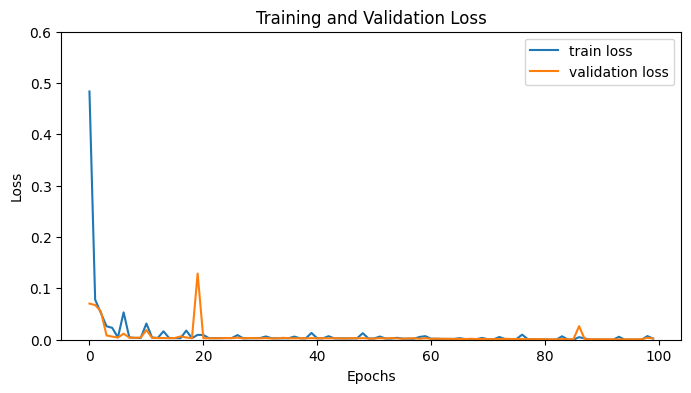

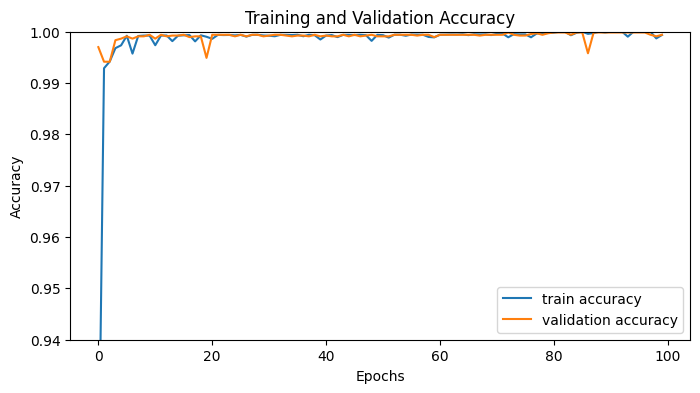

In [ ]:
h = history_100

import matplotlib.pyplot as plt

# Plot the loss value
plt.figure(figsize=(8, 4))
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.6)
plt.show()

# Plot the accuracy value
plt.figure(figsize=(8, 4))
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.94, 1)
plt.show()

for 500 ep

In [ ]:
"""import matplotlib.pyplot as plt

h = history_500

#accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.80, 1)  # Set y-axis range from 0.94 to 1
plt.show()

#loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1.6)  # Set y-axis range from 0.94 to 1
plt.show()
"""
print()

In [ ]:
##import matplotlib.pyplot as plt
#history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.1)

# Assuming 'history' is the training history obtained from model.fit()
# 'history' typically includes 'loss' and 'val_loss' for training and validation loss

# Plot training and validation loss
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Training and Validation Loss over Epochs')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()
################################################################################

ROC curve for 100 ep

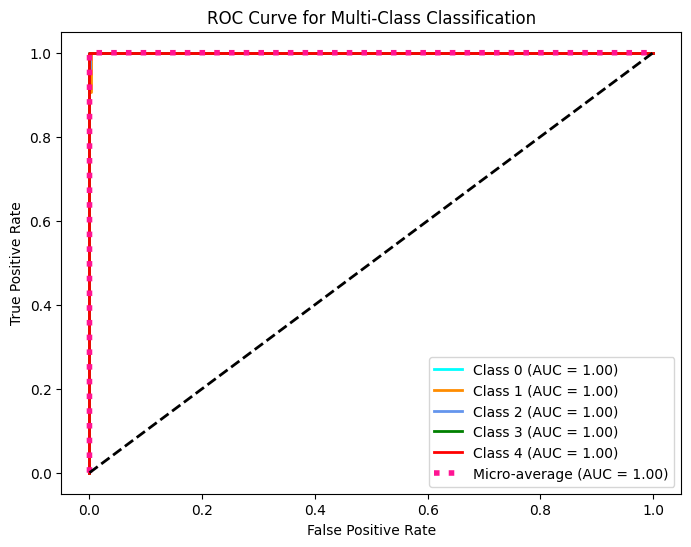

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
#ROC from  net
#one-hot encoded labels to binary format
y_test_binary = label_binarize(Y_test_100, classes=[0, 1, 2, 3, 4])

#ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_binary.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], predictions_100[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), predictions_100.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(y_test_binary.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


Roc curve for 500 ep

In [ ]:

"""y_test_binary = label_binarize(Y_test_500, classes=[0, 1, 2, 3, 4])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_binary.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], predictions_500[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), predictions_500.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(y_test_binary.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()"""
print()


# **Comparison of Performance Report**

100ep

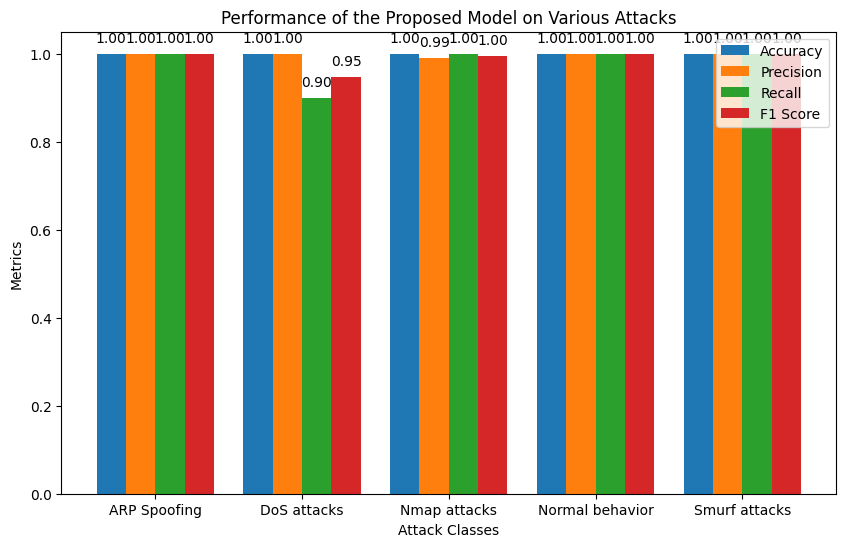

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#bar plot taken from net
attack_classes = ["ARP Spoofing", "DoS attacks", "Nmap attacks", "Normal behavior", "Smurf attacks"]


accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


for i in range(len(attack_classes)):
    true_labels_i = (Y_test_100.argmax(axis=1) == i).astype(int)
    predicted_labels_i = (predictions_100.argmax(axis=1) == i).astype(int)

    accuracy_list.append(accuracy_score(true_labels_i, predicted_labels_i))
    precision_list.append(precision_score(true_labels_i, predicted_labels_i))
    recall_list.append(recall_score(true_labels_i, predicted_labels_i))
    f1_list.append(f1_score(true_labels_i, predicted_labels_i))


fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(attack_classes))

bar1 = ax.bar(index, accuracy_list, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision_list, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall_list, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_list, bar_width, label='F1 Score')

ax.set_xlabel('Attack Classes')
ax.set_ylabel('Metrics')
ax.set_title('Performance of the Proposed Model on Various Attacks')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(attack_classes)
ax.legend()


for i, value in enumerate(accuracy_list + precision_list + recall_list + f1_list):
    ax.text(i % len(attack_classes) + (i // len(attack_classes)) * bar_width,
            value + 0.02,
            f'{value:.2f}',
            ha='center', va='bottom', color='black')

plt.show()
#100

500ep

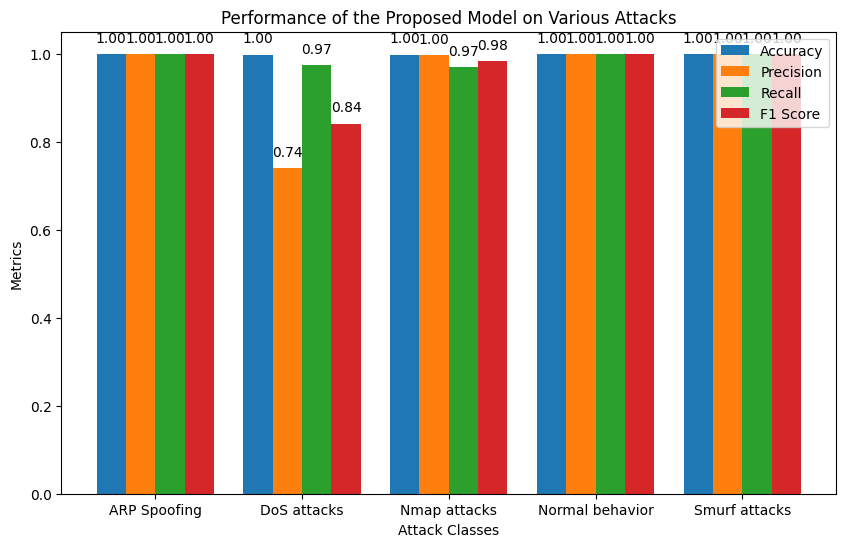

In [ ]:
"""import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

attack_classes = ["ARP Spoofing", "DoS attacks", "Nmap attacks", "Normal behavior", "Smurf attacks"]

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in range(len(attack_classes)):
    true_labels_i = (Y_test_500.argmax(axis=1) == i).astype(int)
    predicted_labels_i = (predictions_500.argmax(axis=1) == i).astype(int)

    accuracy_list.append(accuracy_score(true_labels_i, predicted_labels_i))
    precision_list.append(precision_score(true_labels_i, predicted_labels_i))
    recall_list.append(recall_score(true_labels_i, predicted_labels_i))
    f1_list.append(f1_score(true_labels_i, predicted_labels_i))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(attack_classes))

bar1 = ax.bar(index, accuracy_list, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision_list, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall_list, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_list, bar_width, label='F1 Score')

ax.set_xlabel('Attack Classes')
ax.set_ylabel('Metrics')
ax.set_title('Performance of the Proposed Model on Various Attacks')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(attack_classes)
ax.legend()


for i, value in enumerate(accuracy_list + precision_list + recall_list + f1_list):
    ax.text(i % len(attack_classes) + (i // len(attack_classes)) * bar_width,
            value + 0.02,
            f'{value:.2f}',
            ha='center', va='bottom', color='black')

plt.show()
#100